### Importación de datos



In [27]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
tienda2.head()
tienda3.head()
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


#1. Análisis de facturación



Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


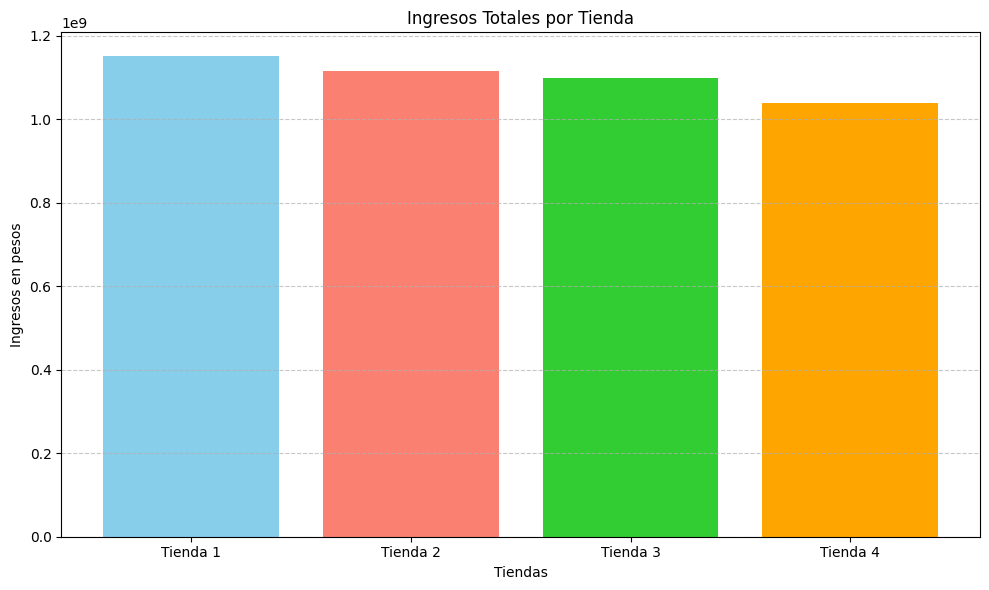

In [28]:
ingresos = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

for tienda, ingreso in ingresos.items():
    print(f"{tienda}: ${ingreso:,.0f}")

plt.figure(figsize=(10, 6))
plt.bar(ingresos.keys(), ingresos.values(), color=['skyblue', 'salmon', 'limegreen', 'orange'])
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingresos en pesos")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
print("\nProductos vendidos por categoría - Tienda 1")
print(tienda["Categoría del Producto"].value_counts())

print("\nProductos vendidos por categoría - Tienda 2")
print(tienda2["Categoría del Producto"].value_counts())

print("\nProductos vendidos por categoría - Tienda 3")
print(tienda3["Categoría del Producto"].value_counts())

print("\nProductos vendidos por categoría - Tienda 4")
print(tienda4["Categoría del Producto"].value_counts())


Productos vendidos por categoría - Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Productos vendidos por categoría - Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Productos vendidos por categoría - Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177


# 3. Calificación promedio de la tienda


In [24]:
promedios = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


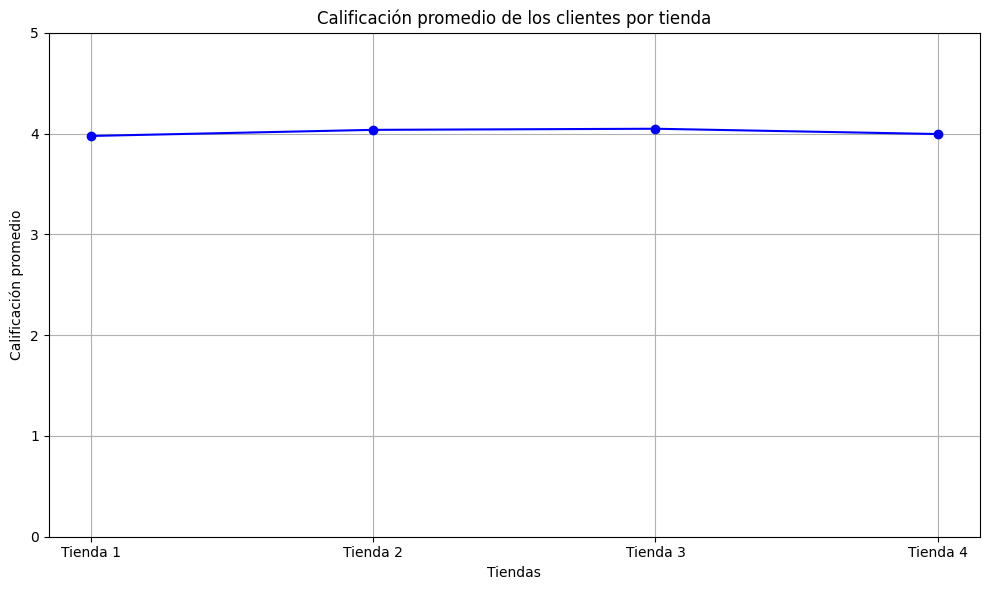

In [29]:
for tienda, promedio in promedios.items():
    print(f"{tienda}: {promedio:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(list(promedios.keys()), list(promedios.values()), marker='o', linestyle='-', color='blue')
plt.title("Calificación promedio de los clientes por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [9]:
def analizar_ventas(df, nombre_tienda):
    conteo = df["Producto"].value_counts()
    mas_vendido = conteo.idxmax()
    menos_vendido = conteo.idxmin()

    print(f"\n{nombre_tienda}")
    print(f"Producto más vendido: {mas_vendido} ({conteo.max()} unidades)")
    print(f"Producto menos vendido: {menos_vendido} ({conteo.min()} unidades)")
    print("\nTop 5 productos más vendidos:")
    for producto, cantidad in conteo.head(5).items():
      print(f"{producto}: {cantidad} unidades")
    print("\nTop 5 productos menos vendidos:")
    for producto, cantidad in conteo.tail(5).items():
      print(f"{producto}: {cantidad} unidades")

# Aplicar análisis a cada tienda
analizar_ventas(tienda, "Tienda 1")
analizar_ventas(tienda2, "Tienda 2")
analizar_ventas(tienda3, "Tienda 3")
analizar_ventas(tienda4, "Tienda 4")


Tienda 1
Producto más vendido: Microondas (60 unidades)
Producto menos vendido: Auriculares con micrófono (33 unidades)

Top 5 productos más vendidos:
Microondas: 60 unidades
TV LED UHD 4K: 60 unidades
Armario: 60 unidades
Secadora de ropa: 58 unidades
Mesa de noche: 56 unidades

Top 5 productos menos vendidos:
Ciencia de datos con Python: 39 unidades
Pandereta: 36 unidades
Olla de presión: 35 unidades
Auriculares con micrófono: 33 unidades
Celular ABXY: 33 unidades

Tienda 2
Producto más vendido: Iniciando en programación (65 unidades)
Producto menos vendido: Juego de mesa (32 unidades)

Top 5 productos más vendidos:
Iniciando en programación: 65 unidades
Microondas: 62 unidades
Batería: 61 unidades
Guitarra acústica: 58 unidades
Pandereta: 58 unidades

Top 5 productos menos vendidos:
Auriculares: 37 unidades
Sillón: 35 unidades
Mesa de comedor: 34 unidades
Impresora: 34 unidades
Juego de mesa: 32 unidades

Tienda 3
Producto más vendido: Kit de bancas (57 unidades)
Producto menos ven

# 5. Envío promedio por tienda

Costo de envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


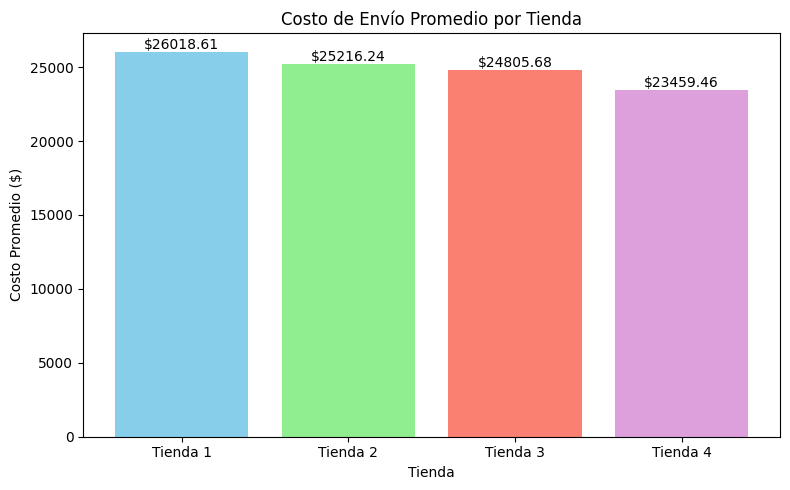

In [20]:
promedio_envio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

print("Costo de envío promedio por tienda:")
for tienda, costo in promedio_envio.items():
    print(f"{tienda}: ${costo:.2f}")

tiendas = list(promedio_envio.keys())
costos = list(promedio_envio.values())
colores = ['skyblue', 'lightgreen', 'salmon', 'plum']

plt.figure(figsize=(8, 5))
bars = plt.bar(tiendas, costos, color=colores)
plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo Promedio ($)")
plt.xlabel("Tienda")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"${yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()